# Import

In [1]:
!pip install pyspellchecker

     |████████████████████████████████| 2.7 MB 267 kB/s            


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import spacy
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import tensorflow as tf
import nltk
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *
import re
from spellchecker import SpellChecker
import seaborn as sns

from sklearn.model_selection import train_test_split

import gensim
from gensim.models import Word2Vec
from gensim import utils
from math import isnan

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer


import keras
from tensorflow.keras.utils import to_categorical

import gc
import torch
import itertools

from sklearn.model_selection import KFold
import shutil

from sklearn.metrics import confusion_matrix
import seaborn as sns

/kaggle/input/lemmatized-sentiment140/full_data_cleaned.csv
/kaggle/input/lemmatized-sentiment140/X_test.csv
/kaggle/input/lemmatized-sentiment140/X_train.csv
/kaggle/input/lemmatized-sentiment140/word2vec_model
/kaggle/input/lemmatized-sentiment140/eurecom_data.csv
/kaggle/input/lemmatized-sentiment140/financial_data2_cleaned.csv
/kaggle/input/lemmatized-sentiment140/financial_data_cleaned.csv
/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


# Data Import

In [ ]:
# On a un problème d'encoding de la data, nous sommes obligé de la rencodé en latin
# On enlève les lignes que nous ne voulons pas
# On drop les lignes contenant des NaN

# full_data = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', 
#                         encoding='latin-1').drop(["1467810369",
#                                                   "Mon Apr 06 22:19:45 PDT 2009",
#                                                   "NO_QUERY","_TheSpecialOne_"],
#                                                  axis=1).dropna()

# # On renomme les colones avec nos termes pour être plus à l'aise
# columns_names = list(full_data)
# full_data.rename(columns={columns_names[0]:"label",
#                         columns_names[1]:"text"}, inplace= True)

# Data Visualisation

In [ ]:
# groups = full_data.groupby('label').count()
# list_labels = [0 for i in range(5)]
# for index, elt in groups.iterrows():
#     list_labels[index]=elt['text']

In [ ]:
# plt.bar([0,1,2,3,4],list_labels,align='center',width = 0.5)
# plt.show()

# Preprocess

## Labels

In [ ]:
# full_data['label'] = full_data['label'].apply(lambda x: 1 if x==4 else 0)

## NLP

In [ ]:
# nlp = spacy.load('en_core_web_sm')

In [ ]:
def extract_tokens(text):
    """Extract tokens and metadata from individual spaCy doc."""
    doc = nlp(text)
    tokens_return = []
    for i in doc:
        condition = not i.is_punct and not i.is_space and not i.is_stop
        condition2 = not i.is_stop
        #print("here we are looking at {} and the condition {} {}".format(i,condition, condition2))
        if condition:
            #print("we are going from {} to {}".format(j.text,j.lemma_))
            #print(j.lemma_)
            tokens_return.append(i.lemma_)
    return ' '.join(tokens_return)

In [ ]:
def extract_tokens_plus_meta(doc):
    """Extract tokens and metadata from individual spaCy doc."""
    tokens_return = []
    for j in doc:
        for i in j:
            condition = not i.is_punct and not i.is_space 
            condition2 = not i.is_stop
            #print("here we are looking at {} and the condition {} {}".format(i,condition, condition2))
            if condition:
                #print("we are going from {} to {}".format(j.text,j.lemma_))
                #print(j.lemma_)
                tokens_return.append(i.lemma_)
    return tokens_return

### Finding what stop words to remove

In [ ]:
# X_stop_words = full_data.sample(n=10000)

In [ ]:
# X_stop_words_pos = X_stop_words[X_stop_words['label']==4]
# X_stop_words_neg = X_stop_words[X_stop_words['label']==0]

In [ ]:
# doc_pos = nlp.pipe(X_stop_words_pos.text)
# doc_neg = nlp.pipe(X_stop_words_neg.text)

In [ ]:
# nb_tokens_pos = []
# list_mots = []
# nb_pos_dict = {}
# tweets_pos=extract_tokens_plus_meta(doc_pos)
# #tweets_neg= extract_tokens_plus_meta(doc_neg) 
# for mot in tweets_pos:
#     if(mot not in list_mots):
#         list_mots.append(mot)
#         count = tweets_pos.count(mot)
#         nb_pos_dict[mot] = count
#         nb_tokens_pos.append([mot,count])
    

In [ ]:
# nb_tokens_neg = []
# tweets_neg=extract_tokens_plus_meta(doc_neg)
# #tweets_neg= extract_tokens_plus_meta(doc_neg) 
# list_mots2 = []
# nb_neg_dict = {}
# for mot in tweets_neg:
#     if(mot not in list_mots2):
#         count = tweets_neg.count(mot)
#         list_mots2.append(mot)
#         nb_neg_dict[mot] = count
#         nb_tokens_neg.append([mot,count])

In [ ]:
# nb_tokens_pos.sort(key=lambda x: x[1], reverse=True)
# nb_tokens_neg.sort(key=lambda x: x[1], reverse=True)
# word_tokens_pos = [x[0] for x in nb_tokens_pos[:500]]
# word_tokens_neg = [x[0] for x in nb_tokens_neg[:500]]

In [ ]:
def condition(mot,seuil):
    if(not mot in list_mots2):
        return True
    if(not mot in list_mots):
        return True
    if(nb_neg_dict[mot]/nb_pos_dict[mot]>seuil or nb_pos_dict[mot]/nb_neg_dict[mot]> seuil):
        return True

In [ ]:
not_stop_words = []
def creation_stop_words(pos, neg,seuille1,seuille2):
    for mot in word_tokens_pos[:seuille1]:
        if condition(mot,seuille2):
            not_stop_words.append(mot)
    for mot in word_tokens_neg[:seuille1]:
        if condition(mot,seuille2):
            not_stop_words.append(mot)
    

In [ ]:
# creation_stop_words(word_tokens_pos, word_tokens_neg, 300, 2)

In [ ]:
i = 0
for word in not_stop_words:
    nlp.vocab[word].is_stop=False
    try:
        #print(word)
        nlp.Defaults.stop_words.remove(word)
    except:
        print(word + ' is not in stop words')
    i+=1
    if i==10:
        break

In [ ]:
# full_data['cleaned_text'] = full_data['text'].apply(extract_tokens)

In [ ]:
# full_data.to_csv('./full_data_cleaned.csv')

## Load full dataset

In [ ]:
full_data = pd.read_csv('../input/lemmatized-sentiment140/full_data_cleaned.csv')

In [ ]:
full_data['label'] = full_data['label'].apply(lambda x: 1 if x==4 else 0)

In [ ]:
# Dropping rows with nan values
full_data = full_data.dropna()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(full_data['cleaned_text'], full_data['label'], 
                     test_size=0.25, 
                     random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
# y_val.shape

In [ ]:
# X_val.shape

# Vectorisation Word 2 Vec

In [ ]:
df_train = X_train.copy()
df_test = X_test.copy()
df_val = X_val.copy()

In [ ]:
df_total = pd.concat([df_train, df_test, df_val], axis=0)

In [11]:
class MyCorpus:
    def __iter__(self):
        for row in df_total:
            yield utils.simple_preprocess(row)

In [ ]:
# sentences = MyCorpus()

In [ ]:
# wv_model = gensim.models.Word2Vec(sentences=sentences)

In [ ]:
# wv_model.train(sentences, total_examples=wv_model.corpus_count, epochs=5)

In [ ]:
# wv_model.save('./word2vec_model')

## Load W2V model

In [ ]:
wv_model = gensim.models.Word2Vec.load('../input/lemmatized-sentiment140/word2vec_model')

# Padding and Tokenization

In [ ]:
num_words = len(list(wv_model.wv.index_to_key))
tokenizer = Tokenizer(num_words, lower=True)
tokenizer.fit_on_texts(df_total)

In [ ]:
X_train_tok = tokenizer.texts_to_sequences(df_train)
X_train_pad = pad_sequences(X_train_tok, maxlen=50, padding='post')
X_test_tok = tokenizer.texts_to_sequences(df_test)
X_test_pad = pad_sequences(X_test_tok, maxlen=50, padding='post')
X_val_tok = tokenizer.texts_to_sequences(df_val)
X_val_pad = pad_sequences(X_val_tok, maxlen=50, padding='post')

## Liberating memory

In [ ]:
del full_data
gc.collect()

In [ ]:
del X_train
del X_test
del X_val
del X_train_tok
del X_test_tok
del X_val_tok
del df_train
del df_test
del df_val
gc.collect()

In [ ]:
del df_total
gc.collect()

# Creating Weight matrix for Embedding based on W2V

In [ ]:
# Building weight matrix to use it into an Embedding layer in the models
# vector_size = 100
# gensim_weight_matrix = np.zeros((num_words ,vector_size))
# gensim_weight_matrix.shape
# for word, index in tokenizer.word_index.items():
#     if index < num_words: # since index starts with zero 
#         if word in list(wv_model.wv.index_to_key):
#             gensim_weight_matrix[index] = wv_model.wv[word]
#         else:
#             gensim_weight_matrix[index] = np.zeros(100)

In [ ]:
del tokenizer
del wv_model
gc.collect()

# Models

In [8]:
# Plotting the results
def plot_history(history, loss, model_name="LSTM"):
    # summarize history for loss
    if loss:
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(model_name + ' Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='best')
        plt.show()
        print( "\n\nBest Loss on validation : {0:.4f}".format( np.min( history.history['val_loss'] ) ) )
    # Accuracy
    else:
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(model_name + ' Model Accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='best')
        plt.show()
        print( "\n\nBest Accuracy on validation : {0:.4f}".format( np.max( history.history['val_accuracy'] ) ) )

## LSTM & biLSTM

### Grid Search pour learning rate et batch size

Utilisation d'un early stopping (pas besoin de toucher au nombre d'epochs) <br>
Tests sur l'architecture (nombre de couches, dimensions)

In [ ]:
class_num = 2
epochs = 50
lr_list = [0.1, 0.05, 0.01]
batch_sizes = [2000, 5000]
dropout = 0.4
embedding_dim = 100
n_layers = 1

ES_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4)
]

In [3]:
def create_model(bilstm_bool, dropout, embedding_dim, n_layers, class_num, X_train):
    lstm_model = keras.Sequential()
    
    lstm_model.add(keras.layers.Embedding(
                input_dim = num_words,
                output_dim = embedding_dim,
                input_length = X_train.shape[1]))
    
    # Chain of LSTM layers and dropouts for regularization

    for i in range(n_layers-1):
        if bilstm_bool:
            lstm_model.add(tf.keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim, return_sequences=True)))
        else:
            lstm_model.add(keras.layers.LSTM(embedding_dim, return_sequences=True))
        # Add dropout after every LSTM layer
        lstm_model.add(keras.layers.Dropout(dropout))
        
    # Last layer
    if bilstm_bool:
        lstm_model.add(tf.keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim, return_sequences=False)))
    else:
        lstm_model.add(keras.layers.LSTM(embedding_dim, return_sequences=False))
    
    lstm_model.add(keras.layers.Dropout(dropout))
    lstm_model.add(keras.layers.Dense(class_num, activation='softmax'))
    
    return lstm_model

In [ ]:
def grid_search(bilstm_bool, lr_list, batch_sizes, dropout, embedding_dim, n_layers, epochs, class_num, X_train):
    columns = ['lr', 'batch_size', 'dropout', 'embedding_dim', 'n_layers', 'train_acc', 'val_acc']
    results = []
    
    
    model = create_model(bilstm_bool=bilstm_bool, dropout=dropout, embedding_dim=embedding_dim, n_layers=n_layers, class_num=class_num, X_train=X_train)
    
    for (lr, batch_size) in itertools.product(lr_list, batch_sizes):
        print("Processing lr: {}, batch_size: {}, dropout: {}, embedding_dim: {}, n_layers: {}".format(lr, batch_size, dropout, embedding_dim, n_layers))
        # Compiling model
        model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=lr), 
                       metrics=['accuracy'])
        
        model_history = model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=epochs, batch_size=batch_size, verbose=0, callbacks=ES_callbacks)
        
        results.append( [lr, batch_size, dropout, embedding_dim, n_layers, model_history.history['accuracy'][-1], model_history.history['val_accuracy'][-1] ] )
        
#         del model
        del model_history
        gc.collect()
    
    return columns, results

In [4]:
def construct_results_df(columns, results):
    return pd.DataFrame(results, columns=columns)

In [ ]:
# columns, results = grid_search(True, lr_list, batch_sizes, dropout, embedding_dim, n_layers, epochs, class_num, X_train_pad)

In [ ]:
# lr_results_df = construct_results_df(columns, results)
# lr_results_df.to_csv('./bilstm_lr_results.csv')

In [ ]:
# construct_results_df(columns, results)

### Learning rate et batch size retenus: 
lr = 0.01 <br>
batch_size = 5000 <br>

### Comparaison des structures de modèles

1, 2, 4 layers

In [ ]:
lr = 0.01
batch_size = 5000
n_layers_list = [1, 2, 4]
dropout = 0.4
embedding_dim = 100
class_num = 2
epochs = 50

columns = ['lr', 'batch_size', 'dropout', 'embedding_dim', 'n_layers', 'train_acc', 'val_acc']

In [ ]:
# results = []
# for n_layers in n_layers_list:
#     print("Treating for {} layers".format(n_layers))
#     model = create_model(bilstm_bool=True, dropout=dropout, embedding_dim=embedding_dim, n_layers=n_layers, class_num=class_num, X_train=X_train_pad)
#     model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#                        optimizer=tf.keras.optimizers.Adam(learning_rate=lr), 
#                        metrics=['accuracy'])
    
#     model_history = model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=epochs, batch_size=batch_size, verbose=0, callbacks=ES_callbacks)
    
#     results.append( [lr, batch_size, dropout, embedding_dim, n_layers, model_history.history['accuracy'][-1], model_history.history['val_accuracy'][-1] ] )

In [ ]:
# layer_results_df = construct_results_df(columns, results)
# layer_results_df.to_csv('./bilstm_layer_results.csv')

In [ ]:
# construct_results_df(columns, results)

### Test d'augmenter le dropout sur le modèle à 4 layers

In [ ]:
model = create_model(bilstm_bool=True, dropout=0.8, embedding_dim=embedding_dim, n_layers=4, class_num=class_num, X_train=X_train_pad)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=lr), 
                       metrics=['accuracy'])
model_history = model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=epochs, batch_size=batch_size, verbose=1, callbacks=ES_callbacks)
print([ lr, batch_size, 0.8, embedding_dim, 4, model_history.history['accuracy'][-1], model_history.history['val_accuracy'][-1] ])

In [ ]:
# result = []
# result.append([lr, batch_size, 0.6, embedding_dim, 4, 0.8458, 0.7780 ])
# result.append([lr, batch_size, 0.8, embedding_dim, 4, 0.8509, 0.7771 ])

# layer_results_df = construct_results_df(columns, result)
# layer_results_df.to_csv('./lstm_4lay_dropout_results.csv')

### Crossvalidation sur les meilleurs modèles

LSTM: lr = 0.01, batch_size = 5000, dropout = 0.6, embedding_dim = 100, n_layers = 4
biLSTM: lr = 0.01, batch_size = 5000, dropout = 0.6, embedding_dim = 100, n_layers = 4

In [ ]:
X = np.concatenate((X_train_pad, X_val_pad))
y = np.concatenate((y_train, y_val))

In [ ]:
lr = 0.01
batch_size = 5000
dropout = 0.6
embedding_dim = 100
n_layers = 4
class_num = 2
epochs = 50
ES_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4)
]

In [ ]:
kf = KFold(n_splits=5)

columns = ['fold', 'train_acc', 'val_acc']
cv_lstm_results = []
fold = 1
for train_index, val_index in kf.split(X):
    print('Processing {}th fold'.format(fold))
    model = create_model(bilstm_bool=False, dropout=dropout, embedding_dim=embedding_dim, n_layers=n_layers, class_num=class_num, X_train=X_train_pad)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=lr), 
                    metrics=['accuracy'])
    
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    model_history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=epochs, batch_size=batch_size, verbose=1, callbacks=ES_callbacks)
#     model_history = model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=epochs, batch_size=batch_size, verbose=1, callbacks=ES_callbacks)
    cv_lstm_results.append([fold, model_history.history['accuracy'][-1], model_history.history['val_accuracy'][-1]])
    fold+=1
    del model
    gc.collect()

In [ ]:
layer_results_df = construct_results_df(columns, cv_lstm_results)
layer_results_df.to_csv('./bilstm_5fold_results.csv')

In [ ]:
layer_results_df

In [ ]:
# Deleting model and history from memory
del lstm_model
del lstm_history
gc.collect()
#torch.cuda.empty_cache()

In [ ]:
lstm_model.summary()

In [ ]:
plot_history(lstm_history, True)

In [ ]:
plot_history(lstm_history, False)

## Tests de performances sur les meilleurs modèles biLSTM et LSTM

### Test sur le dataset Sentiment140, performances sur le test

Entrainement des meilleurs modèles et sauvegarde des poids

In [ ]:
lr = 0.01
batch_size = 5000
dropout = 0.6
embedding_dim = 100
n_layers = 4
class_num = 2
epochs = 50
ES_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4),
    tf.keras.callbacks.ModelCheckpoint(filepath='./checkpoint', save_weights_only=True, 
                                       monitor='val_accuracy', 
                                       mode='max',
                                       save_best_only=True)
]

In [ ]:
lstm_model = create_model(bilstm_bool=False, dropout=dropout, embedding_dim=embedding_dim, n_layers=n_layers, class_num=class_num, X_train=X_train_pad)
lstm_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr), 
                metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=epochs, batch_size=batch_size, callbacks=ES_callbacks)

In [ ]:
lstm_model.load_weights('./checkpoint')
lstm_model.save('./best_lstm')

In [ ]:
shutil.make_archive('./best_bilstm', 'zip', './best_bilstm')

In [ ]:
bilstm_model = create_model(bilstm_bool=True, dropout=dropout, embedding_dim=embedding_dim, n_layers=n_layers, class_num=class_num, X_train=X_train_pad)
bilstm_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr), 
                metrics=['accuracy'])
bilstm_history = bilstm_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=epochs, batch_size=batch_size, callbacks=ES_callbacks)

In [ ]:
bilstm_model.load_weights('./checkpoint')
bilstm_model.save('./best_bilstm')

In [ ]:
plot_history(lstm_history, True)
plt.savefig('./lstm_loss_fig_train.png')

In [ ]:
plot_history(lstm_history, False)
plt.savefig('./lstm_acc_fig_train.png')

In [ ]:
plot_history(bilstm_history, True)
plt.savefig('./bilstm_loss_fig_train.png')

In [ ]:
plot_history(bilstm_history, False)
plt.savefig('./bilstm_acc_fig_train.png')

### Performances sur le test

In [ ]:
ypred_lstm =  lstm_model.predict(X_test_pad)
ypred_bilstm = bilstm_model.predict(X_test_pad)

In [ ]:
ypred_lstm_01 = np.zeros_like(ypred_lstm)
ypred_lstm_01[np.arange(len(ypred_lstm)), ypred_lstm.argmax(1)] = 1

In [ ]:
ypred_bilstm_01 = np.zeros_like(ypred_bilstm)
ypred_bilstm_01[np.arange(len(ypred_bilstm)), ypred_bilstm.argmax(1)] = 1

In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_lstm_class = np.argmax(ypred_lstm_01, axis=1)
y_bilstm_class = np.argmax(ypred_bilstm_01, axis=1)

#### CF matrix LSTM

In [ ]:
lstm_cf_matrix = confusion_matrix(y_test_class, y_lstm_class)

In [ ]:
ax = sns.heatmap(lstm_cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.savefig('./lstm_cfmat.png')

## Display the visualization of the Confusion Matrix.
plt.show()

### CF matrix biLSTM

In [ ]:
bilstm_cf_matrix = confusion_matrix(y_test_class, y_bilstm_class)

In [ ]:
ax = sns.heatmap(bilstm_cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.savefig('./bilstm_cfmat.png')

## Display the visualization of the Confusion Matrix.
plt.show()

### Accuracies

In [27]:
def accuracy(y_pred, y_test):
    N = y_pred.shape[0]
    count = np.count_nonzero(y_pred == y_test)
    return count/N

In [ ]:
accuracy(y_lstm_class, y_test_class)

In [ ]:
accuracy(y_bilstm_class, y_test_class)

# Eurecom Dataset

In [5]:
full_data = pd.read_csv('../input/lemmatized-sentiment140/eurecom_data.csv')

In [6]:
full_data['sentiment'] = full_data['sentiment'].apply(lambda x: 1 if x=='positive' else (0 if x=='neutral' else -1))
full_data = full_data.dropna()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(full_data['cleaned_text'], full_data['sentiment'], 
                     test_size=0.25, 
                     random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

In [9]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)
y_val = to_categorical(y_val, 3)

### W2V

In [12]:
df_train = X_train.copy()
df_test = X_test.copy()
df_val = X_val.copy()
df_total = pd.concat([df_train, df_test, df_val], axis=0)

sentences = MyCorpus()
wv_model = gensim.models.Word2Vec(sentences=sentences)
wv_model.train(sentences, total_examples=wv_model.corpus_count, epochs=5)
wv_model.save('./word2vec_eurecom_model')

## Tokenization

In [13]:
num_words = len(list(wv_model.wv.index_to_key))
tokenizer = Tokenizer(num_words, lower=True)
tokenizer.fit_on_texts(df_total)
X_train_tok = tokenizer.texts_to_sequences(df_train)
X_train_pad = pad_sequences(X_train_tok, maxlen=50, padding='post')
X_test_tok = tokenizer.texts_to_sequences(df_test)
X_test_pad = pad_sequences(X_test_tok, maxlen=50, padding='post')
X_val_tok = tokenizer.texts_to_sequences(df_val)
X_val_pad = pad_sequences(X_val_tok, maxlen=50, padding='post')

In [14]:
del full_data
del X_train
del X_test
del X_val
del X_train_tok
del X_test_tok
del X_val_tok
del df_train
del df_test
del df_val
del df_total
gc.collect()

23

## Entrainement des modèles sur le problème à 3 classes

Grid Search sur le learning rate, plus besoin de batch size car le dataset est assez petit

In [15]:
lr_list = [0.01, 0.05, 0.001, 0.0005, 0.0001]
dropout = 0.6
embedding_dim = 100
n_layers = 4
class_num = 3
epochs = 50

ES_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20),
    tf.keras.callbacks.ModelCheckpoint(filepath='./checkpoint_lstm', save_weights_only=True, 
                                       monitor='val_accuracy', 
                                       mode='max',
                                       save_best_only=True)
]

In [ ]:
def grid_search(bilstm_bool, lr_list, dropout, embedding_dim, n_layers, epochs, class_num, X_train):
    columns = ['lr', 'dropout', 'embedding_dim', 'n_layers', 'train_acc', 'val_acc']
    results = []
    
    for lr in lr_list:
        print("Processing lr: {}, dropout: {}, embedding_dim: {}, n_layers: {}".format(lr, dropout, embedding_dim, n_layers))
        
        model = create_model(bilstm_bool=bilstm_bool, dropout=dropout, embedding_dim=embedding_dim, n_layers=n_layers, class_num=class_num, X_train=X_train)
        
        # Compiling model
        model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=lr), 
                       metrics=['accuracy'])
        
        model_history = model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=epochs, verbose=0, callbacks=ES_callbacks)
        
        index_max = np.argmax(model_history.history['val_accuracy'])
        results.append([lr, dropout, embedding_dim, n_layers, model_history.history['accuracy'][index_max], model_history.history['val_accuracy'][index_max]])
        
        del model
        del model_history
        gc.collect()
    
    return columns, results

In [ ]:
columns, results = grid_search(True, lr_list, dropout, embedding_dim, n_layers, epochs, class_num, X_train_pad)

In [ ]:
layer_results_df = construct_results_df(columns, results)
layer_results_df.to_csv('./bilstm_eurecom_gs_results.csv')

In [ ]:
construct_results_df(columns, results)

### Crossvalidation

In [16]:
lr_lstm = 0.001
lr_bilstm = 0.0005

In [ ]:
X = np.concatenate((X_train_pad, X_val_pad))
y = np.concatenate((y_train, y_val))

In [ ]:
kf = KFold(n_splits=5)

columns = ['fold', 'train_acc', 'val_acc']
cv_lstm_results = []
fold = 1
for train_index, val_index in kf.split(X):
    print('Processing {}th fold'.format(fold))
    model = create_model(bilstm_bool=True, dropout=dropout, embedding_dim=embedding_dim, n_layers=n_layers, class_num=class_num, X_train=X_train_pad)
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate = lr_bilstm), # Changer ici le learning rate
                    metrics=['accuracy'])
    
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    model_history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=epochs, verbose=0, callbacks=ES_callbacks)
    
    index_max = np.argmax(model_history.history['val_accuracy'])
    cv_lstm_results.append([fold, model_history.history['accuracy'][index_max], model_history.history['val_accuracy'][index_max]])
    fold+=1
    del model
    gc.collect()

In [ ]:
layer_results_df = construct_results_df(columns, cv_lstm_results)
layer_results_df.to_csv('./bilstm_5fold_eurecom_results.csv')

In [ ]:
construct_results_df(columns, cv_lstm_results)

### Performances sur le test

In [33]:
lstm_model = create_model(bilstm_bool=False, dropout=dropout, embedding_dim=embedding_dim, n_layers=n_layers, class_num=class_num, X_train=X_train_pad)
lstm_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
#                 optimizer=tf.keras.optimizers.Adam(learning_rate=lr_lstm), 
                optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr_lstm),
                metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=epochs, callbacks=ES_callbacks)

Epoch 1/50
434/434 [==============================] - 13s 19ms/step - loss: 1.0765 - accuracy: 0.4091 - val_loss: 1.0460 - val_accuracy: 0.4341
Epoch 2/50
434/434 [==============================] - 7s 16ms/step - loss: 0.8965 - accuracy: 0.5783 - val_loss: 0.7890 - val_accuracy: 0.6686
Epoch 3/50
434/434 [==============================] - 8s 17ms/step - loss: 0.7784 - accuracy: 0.6760 - val_loss: 0.7557 - val_accuracy: 0.6818
Epoch 4/50
434/434 [==============================] - 7s 17ms/step - loss: 0.7154 - accuracy: 0.7226 - val_loss: 0.7443 - val_accuracy: 0.6941
Epoch 5/50
434/434 [==============================] - 7s 16ms/step - loss: 0.6836 - accuracy: 0.7420 - val_loss: 0.7430 - val_accuracy: 0.7006
Epoch 6/50
434/434 [==============================] - 7s 16ms/step - loss: 0.6459 - accuracy: 0.7577 - val_loss: 0.7611 - val_accuracy: 0.6846
Epoch 7/50
434/434 [==============================] - 7s 16ms/step - loss: 0.6285 - accuracy: 0.7714 - val_loss: 0.7726 - val_accuracy: 0.690

In [34]:
lstm_model.load_weights('./checkpoint_lstm')

In [35]:
ES_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20),
    tf.keras.callbacks.ModelCheckpoint(filepath='./checkpoint_bilstm', save_weights_only=True, 
                                       monitor='val_accuracy', 
                                       mode='max',
                                       save_best_only=True)
]

In [36]:
bilstm_model = create_model(bilstm_bool=True, dropout=dropout, embedding_dim=embedding_dim, n_layers=n_layers, class_num=class_num, X_train=X_train_pad)
bilstm_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
#                 optimizer=tf.keras.optimizers.Adam(learning_rate=lr_bilstm), 
                optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr_bilstm),
                metrics=['accuracy'])
bilstm_history = bilstm_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=epochs, callbacks=ES_callbacks)

Epoch 1/50
434/434 [==============================] - 25s 34ms/step - loss: 0.9302 - accuracy: 0.5439 - val_loss: 0.7785 - val_accuracy: 0.6636
Epoch 2/50
434/434 [==============================] - 13s 29ms/step - loss: 0.7264 - accuracy: 0.6989 - val_loss: 0.7271 - val_accuracy: 0.6939
Epoch 3/50
434/434 [==============================] - 13s 30ms/step - loss: 0.6740 - accuracy: 0.7290 - val_loss: 0.7078 - val_accuracy: 0.7019
Epoch 4/50
274/434 [=================>............] - ETA: 4s - loss: 0.6308 - accuracy: 0.7551

KeyboardInterrupt: 

In [ ]:
bilstm_model.load_weights('./checkpoint_bilstm')
bilstm_model.save('./best_bilstm_eurecom')

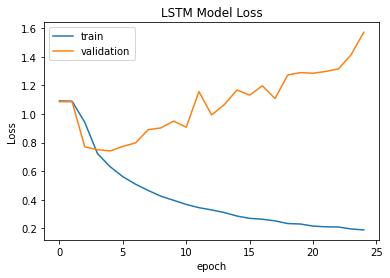



Best Loss on validation : 0.7416


<Figure size 432x288 with 0 Axes>

In [22]:
plot_history(lstm_history, True)
plt.savefig('./lstm_loss_eurecom_train.png')

In [ ]:
plot_history(lstm_history, False)
plt.savefig('./lstm_accuracy_eurecom_train.png')

In [ ]:
plot_history(bilstm_history, True)
plt.savefig('./bilstm_loss_eurecom_train.png')

In [ ]:
plot_history(bilstm_history, False)
plt.savefig('./bilstm_accuracy_eurecom_train.png')

### Prédictions

In [23]:
ypred_lstm =  lstm_model.predict(X_test_pad)
ypred_bilstm = bilstm_model.predict(X_test_pad)

ypred_lstm_01 = np.zeros_like(ypred_lstm)
ypred_lstm_01[np.arange(len(ypred_lstm)), ypred_lstm.argmax(1)] = 1

ypred_bilstm_01 = np.zeros_like(ypred_bilstm)
ypred_bilstm_01[np.arange(len(ypred_bilstm)), ypred_bilstm.argmax(1)] = 1

y_test_class = np.argmax(y_test, axis=1)
y_lstm_class = np.argmax(ypred_lstm_01, axis=1)
y_bilstm_class = np.argmax(ypred_bilstm_01, axis=1)

### Matrice de confusion

#### LSTM

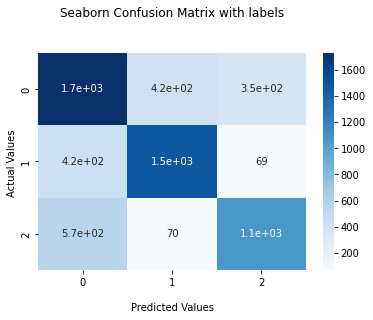

In [24]:
lstm_cf_matrix = confusion_matrix(y_test_class, y_lstm_class)

ax = sns.heatmap(lstm_cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.savefig('./lstm_cfmat_eurecom.png')

## Display the visualization of the Confusion Matrix.
plt.show()

#### biLSTM

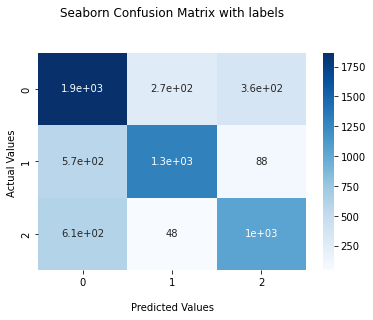

In [25]:
bilstm_cf_matrix = confusion_matrix(y_test_class, y_bilstm_class)

ax = sns.heatmap(bilstm_cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.savefig('./bilstm_cfmat_eurecom.png')

## Display the visualization of the Confusion Matrix.
plt.show()

In [28]:
accuracy(y_lstm_class, y_test_class)

0.6916342412451362

In [29]:
accuracy(y_bilstm_class, y_test_class)

0.6833657587548638

# Financial data

In [ ]:
full_data = pd.read_csv('../input/lemmatized-sentiment140/financial_data2_cleaned.csv')

In [ ]:
full_data.head()

In [ ]:
full_data['Sentiment'] = full_data['Sentiment'].apply(lambda x: 1 if x=='positive' else (0 if x=='neutral' else -1))

In [ ]:
full_data = full_data.dropna()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(full_data['cleaned_text'], full_data['Sentiment'], 
                     test_size=0.25, 
                     random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

In [ ]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)
y_val = to_categorical(y_val, 3)

### W2V

In [ ]:
df_train = X_train.copy()
df_test = X_test.copy()
df_val = X_val.copy()
df_total = pd.concat([df_train, df_test, df_val], axis=0)

sentences = MyCorpus()
wv_model = gensim.models.Word2Vec(sentences=sentences)
wv_model.train(sentences, total_examples=wv_model.corpus_count, epochs=5)
wv_model.save('./word2vec_financial_model')

## Tokenization

In [ ]:
num_words = len(list(wv_model.wv.index_to_key))
tokenizer = Tokenizer(num_words, lower=True)
tokenizer.fit_on_texts(df_total)
X_train_tok = tokenizer.texts_to_sequences(df_train)
X_train_pad = pad_sequences(X_train_tok, maxlen=50, padding='post')
X_test_tok = tokenizer.texts_to_sequences(df_test)
X_test_pad = pad_sequences(X_test_tok, maxlen=50, padding='post')
X_val_tok = tokenizer.texts_to_sequences(df_val)
X_val_pad = pad_sequences(X_val_tok, maxlen=50, padding='post')

In [ ]:
del full_data
del X_train
del X_test
del X_val
del X_train_tok
del X_test_tok
del X_val_tok
del df_train
del df_test
del df_val
del df_total
gc.collect()

### Entrainement des modèles sur le nouveau problème 

In [ ]:
lr_list = [0.01, 0.05, 0.001, 0.0005, 0.0001]
dropout = 0.6
embedding_dim = 100
n_layers = 4
class_num = 3
epochs = 50

ES_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='./checkpoint', save_weights_only=True, 
                                       monitor='val_accuracy', 
                                       mode='max',
                                       save_best_only=True)
]

In [ ]:
def grid_search(bilstm_bool, lr_list, dropout, embedding_dim, n_layers, epochs, class_num, X_train):
    columns = ['lr', 'dropout', 'embedding_dim', 'n_layers', 'train_acc', 'val_acc']
    results = []
    
    for lr in lr_list:
        print("Processing lr: {}, dropout: {}, embedding_dim: {}, n_layers: {}".format(lr, dropout, embedding_dim, n_layers))
        
        model = create_model(bilstm_bool=bilstm_bool, dropout=dropout, embedding_dim=embedding_dim, n_layers=n_layers, class_num=class_num, X_train=X_train)
        
        # Compiling model
        model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=lr), 
                       metrics=['accuracy'])
        
        model_history = model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=epochs, verbose=0, callbacks=ES_callbacks)
        
        index_max = np.argmax(model_history.history['val_accuracy'])
        results.append([lr, dropout, embedding_dim, n_layers, model_history.history['accuracy'][index_max], model_history.history['val_accuracy'][index_max]])
        
        del model
        del model_history
        gc.collect()
    
    return columns, results

In [ ]:
columns, results = grid_search(True, lr_list, dropout, embedding_dim, n_layers, epochs, class_num, X_train_pad)

In [ ]:
layer_results_df = construct_results_df(columns, results)
layer_results_df.to_csv('./bilstm_finance_gs_results.csv')

In [ ]:
construct_results_df(columns, results)

### Crossval

In [ ]:
lr_lstm = 0.001
lr_bilstm = 0.0005

In [ ]:
X = np.concatenate((X_train_pad, X_val_pad))
y = np.concatenate((y_train, y_val))

In [ ]:
kf = KFold(n_splits=5)

columns = ['fold', 'train_acc', 'val_acc']
cv_lstm_results = []
fold = 1
for train_index, val_index in kf.split(X):
    print('Processing {}th fold'.format(fold))
    model = create_model(bilstm_bool=False, dropout=dropout, embedding_dim=embedding_dim, n_layers=n_layers, class_num=class_num, X_train=X_train_pad)
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate = lr_lstm), 
                    metrics=['accuracy'])
    
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    model_history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=epochs, verbose=0, callbacks=ES_callbacks)
    
    index_max = np.argmax(model_history.history['val_accuracy'])
    cv_lstm_results.append([fold, model_history.history['accuracy'][index_max], model_history.history['val_accuracy'][index_max]])
    fold+=1
    del model
    gc.collect()

In [ ]:
layer_results_df = construct_results_df(columns, cv_lstm_results)
layer_results_df.to_csv('./bilstm_5fold_financial_results.csv')

In [ ]:
construct_results_df(columns, cv_lstm_results)

### Meilleur LR

BiLSTM = 0.0005 <br>
LSTM = 0.001

In [ ]:
ES_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20),
    tf.keras.callbacks.ModelCheckpoint(filepath='./checkpoint_lstm', save_weights_only=True, 
                                       monitor='val_accuracy', 
                                       mode='max',
                                       save_best_only=True)
]

In [ ]:
lstm_model = create_model(bilstm_bool=False, dropout=dropout, embedding_dim=embedding_dim, n_layers=n_layers, class_num=class_num, X_train=X_train_pad)
lstm_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr_lstm), 
                metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=epochs, callbacks=ES_callbacks)

lstm_model.load_weights('./checkpoint_lstm')
lstm_model.save('./best_lstm_fin')

In [ ]:
shutil.make_archive('./best_lstm_fin', 'zip', './best_lstm_fin')

In [ ]:
ES_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20),
    tf.keras.callbacks.ModelCheckpoint(filepath='./checkpoint_bilstm', save_weights_only=True, 
                                       monitor='val_accuracy', 
                                       mode='max',
                                       save_best_only=True)
]

In [ ]:
bilstm_model = create_model(bilstm_bool=True, dropout=dropout, embedding_dim=embedding_dim, n_layers=n_layers, class_num=class_num, X_train=X_train_pad)
bilstm_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr_bilstm), 
                metrics=['accuracy'])
bilstm_history = bilstm_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=epochs, callbacks=ES_callbacks)

In [ ]:
bilstm_model.load_weights('./checkpoint_bilstm')
bilstm_model.save('./best_bilstm_fin')
shutil.make_archive('./best_bilstm_fin', 'zip', './best_bilstm_fin')

In [ ]:
plot_history(lstm_history, True)
plt.savefig('./lstm_loss_financial_train.png')

In [ ]:
plot_history(lstm_history, False)
plt.savefig('./lstm_acc_financial_train.png')

In [ ]:
plot_history(bilstm_history, True)
plt.savefig('./bilstm_loss_financial_train.png')

In [ ]:
plot_history(bilstm_history, False)
plt.savefig('./bilstm_acc_financial_train.png')

### Performances sur le test

In [ ]:
ypred_lstm =  lstm_model.predict(X_test_pad)
ypred_bilstm = bilstm_model.predict(X_test_pad)

ypred_lstm_01 = np.zeros_like(ypred_lstm)
ypred_lstm_01[np.arange(len(ypred_lstm)), ypred_lstm.argmax(1)] = 1

ypred_bilstm_01 = np.zeros_like(ypred_bilstm)
ypred_bilstm_01[np.arange(len(ypred_bilstm)), ypred_bilstm.argmax(1)] = 1

y_test_class = np.argmax(y_test, axis=1)
y_lstm_class = np.argmax(ypred_lstm_01, axis=1)
y_bilstm_class = np.argmax(ypred_bilstm_01, axis=1)

### Matrices de conf

distribution des classes

In [ ]:
_, counts = np.unique(y_test_class, return_counts=True)
counts = counts/y_test_class.shape[0]
pd.DataFrame(counts)

#### LSTM

In [ ]:
lstm_cf_matrix = confusion_matrix(y_test_class, y_lstm_class)

ax = sns.heatmap(lstm_cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.savefig('./lstm_cfmat_financial.png')

## Display the visualization of the Confusion Matrix.
plt.show()

#### biLSTM

In [ ]:
bilstm_cf_matrix = confusion_matrix(y_test_class, y_bilstm_class)

ax = sns.heatmap(bilstm_cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.savefig('./bilstm_cfmat_financial.png')

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
accuracy(y_lstm_class, y_test_class)

In [ ]:
accuracy(y_bilstm_class, y_test_class)